# Session 06. Regression  
- Radius 변수를 기준으로 여성유방암 양성/음성을 분류하는 로지스틱 회귀분석 모델 만들기
- 시각화
- Radius 길이가 20, 0.1일 때의 결과 해석

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [30]:
from sklearn.model_selection import train_test_split

X = cancer['data'] # numpy ndarray to dataframe
X = pd.DataFrame(X, columns=cancer.feature_names)

y = cancer['target']
print(cancer.target_names)
y = (y==0).astype(np.int) # 1: malignant, 0: benign

['malignant' 'benign']


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [25]:
log_reg = LogisticRegression(solver='liblinear').fit(np.array(X_train['mean radius']).reshape(-1,1), y_train)
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [32]:
log_reg.score(np.array(X_test['mean radius']).reshape(-1,1), y_test)

0.1286549707602339

In [33]:
print(log_reg.coef_, log_reg.intercept_)

[[-0.54291739]] [8.19393897]


In [35]:
X['mean radius'].describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: mean radius, dtype: float64

In [38]:
X_new = np.linspace(0, 30, 1000).reshape(-1,1)
y_prob = log_reg.predict_proba(X_new)
log_reg.classes_

array([0, 1])

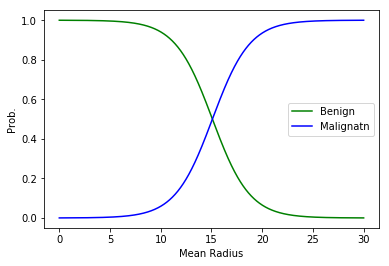

In [51]:
plt.plot(X_new, y_prob[:,1], 'g-', label='Benign')
plt.plot(X_new, y_prob[:,0], 'b-', label='Malignatn')
ax = plt.subplot()
ax.set_xlabel('Mean Radius')
ax.set_ylabel('Prob.')
# plt.xlabel='Mean Radius'
plt.legend()